In [1]:
import pandas as pd
from matplotlib import pyplot as plt

from bigdatavqa.coreset import Coreset
from bigdatavqa.datautils import DataUtils
from bigdatavqa.divisiveclustering import (
    DivisiveClusteringKMeans,
    DivisiveClusteringMaxCut,
    DivisiveClusteringRandom,
    DivisiveClusteringVQE,
    get_divisive_sequence,
)

from bigdatavqa.divisiveclustering import Dendrogram
import warnings

In [2]:
warnings.filterwarnings('ignore')

number_of_qubits = 10
circuit_depth = 1
max_shots = 1000
max_iterations = 100
data_location = "../data"
number_of_coresets_to_evaluate = 15
number_of_sampling_for_centroids = 20
threshold_for_max_cut = 0.2

### Load data

In [3]:
data_utils = DataUtils(data_location)
raw_data = data_utils.load_dataset()

Data loaded from ../data/dataset.pickle


### Get coresets

In [4]:
coreset = Coreset(raw_data, number_of_sampling_for_centroids, number_of_qubits, number_of_coresets_to_evaluate)
coreset_vectors, coreset_weights = coreset.get_best_coresets()

Using BFL16 method to generate coresets


In [5]:
coreset_df = pd.DataFrame(coreset_vectors, columns=list("XY"))
coreset_df['weights'] = coreset_weights
coreset_df["Name"] = [chr(i + 65) for i in coreset_df.index]
coreset_df

,X,Y,weights,Name
0,-0.030619,-1.055982,110.721656,A
1,7.252450,1.321859,149.163261,B
2,0.691054,0.250891,118.447278,C
3,1.565715,-1.975026,78.119918,D
4,-0.148709,0.774461,76.151191,E
5,-0.948321,0.338076,257.369507,F
6,6.931653,-0.313039,52.424278,G
7,4.692513,3.814731,20.166234,H
8,8.617832,-1.161053,25.559662,I
9,1.064157,-0.784273,93.149029,J


Text(0.5, 1.0, 'Visualizing raw data and the corresponding coreset')

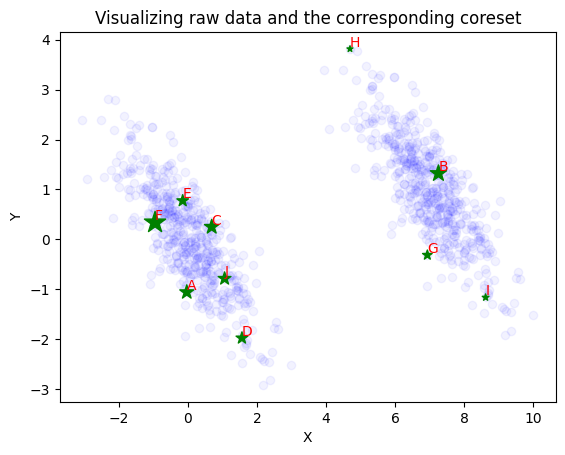

In [6]:
plt.scatter(raw_data[:, 0], raw_data[:, 1], color = 'blue', alpha=0.05)
plt.scatter(coreset_df.X, coreset_df.Y, s = coreset_df.weights, marker='*', color = 'green')
for idx, row in coreset_df.iterrows():
    plt.annotate(row["Name"], xy = (row.X, row.Y+ 0.05), color = "red")

plt.xlabel("X")
plt.ylabel("Y")

plt.title("Visualizing raw data and the corresponding coreset")

In [7]:
divisive_clustering_function = DivisiveClusteringVQE(
    circuit_depth=circuit_depth,
    max_iterations=max_iterations,
    max_shots=max_shots,
    threshold_for_max_cut=threshold_for_max_cut,
)

hierrachial_sequence_using_VQE = get_divisive_sequence(coreset_df, divisive_clustering_function)

print(hierrachial_sequence_using_VQE)

VQE_cost = sum(divisive_clustering_function.get_divisive_cluster_cost(hierrachial_sequence_using_VQE, coreset_df))

print(f"cost: {VQE_cost}")

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_VQE)
dendo.plot_dendrogram()

RuntimeError: NLOpt runtime error: nlopt failure

100%|██████████| 2/2 [00:00<00:00, 45590.26it/s]


[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 3, 4, 5, 6, 8, 9], [0, 2, 7], [4], [1, 3, 5, 6, 8, 9], [0, 7], [2], [1, 3, 9], [5, 6, 8], [0], [7], [1, 3], [9], [5, 8], [6], [1], [3], [5], [8]]
cost: 388.63034553658497


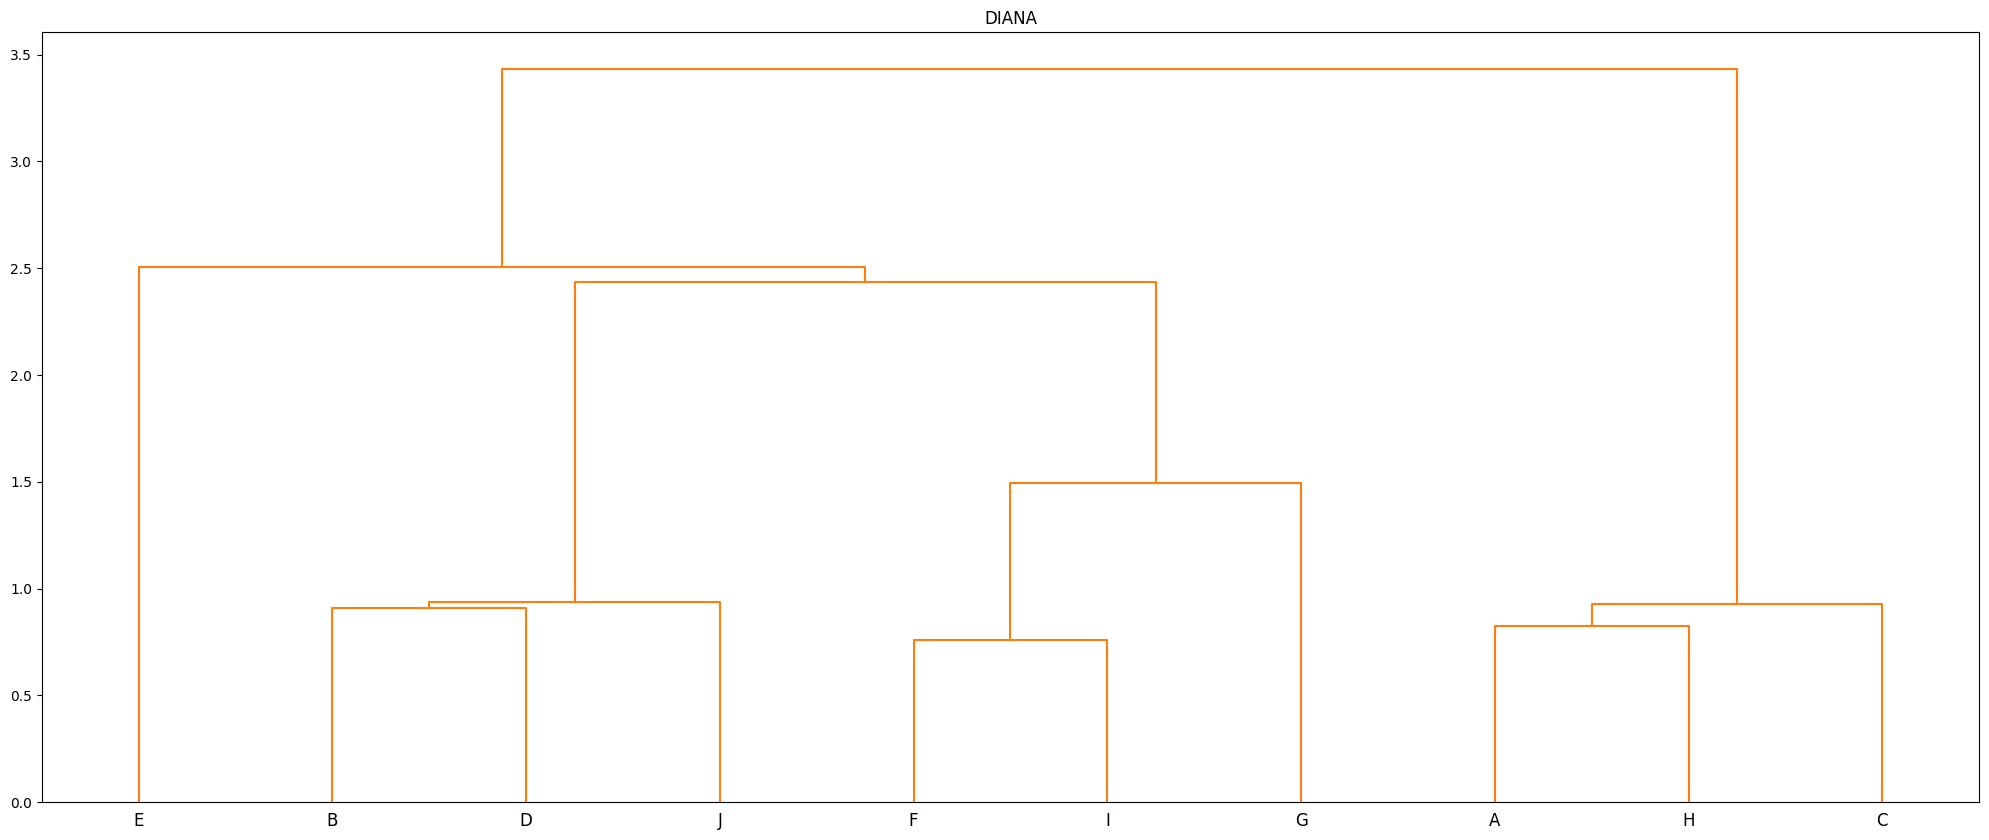

In [8]:
divisive_clustering_function = DivisiveClusteringMaxCut()

hierrachial_sequence_using_MaxCut = get_divisive_sequence(coreset_df, divisive_clustering_function)

print(hierrachial_sequence_using_MaxCut)

MaxCut_cost = sum(divisive_clustering_function.get_divisive_cluster_cost(hierrachial_sequence_using_MaxCut, coreset_df))

print(f"cost: {MaxCut_cost}")

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_MaxCut)
dendo.plot_dendrogram()

cost: 224.30738689305613


ValueError: Linkage 'Z' contains negative distances.

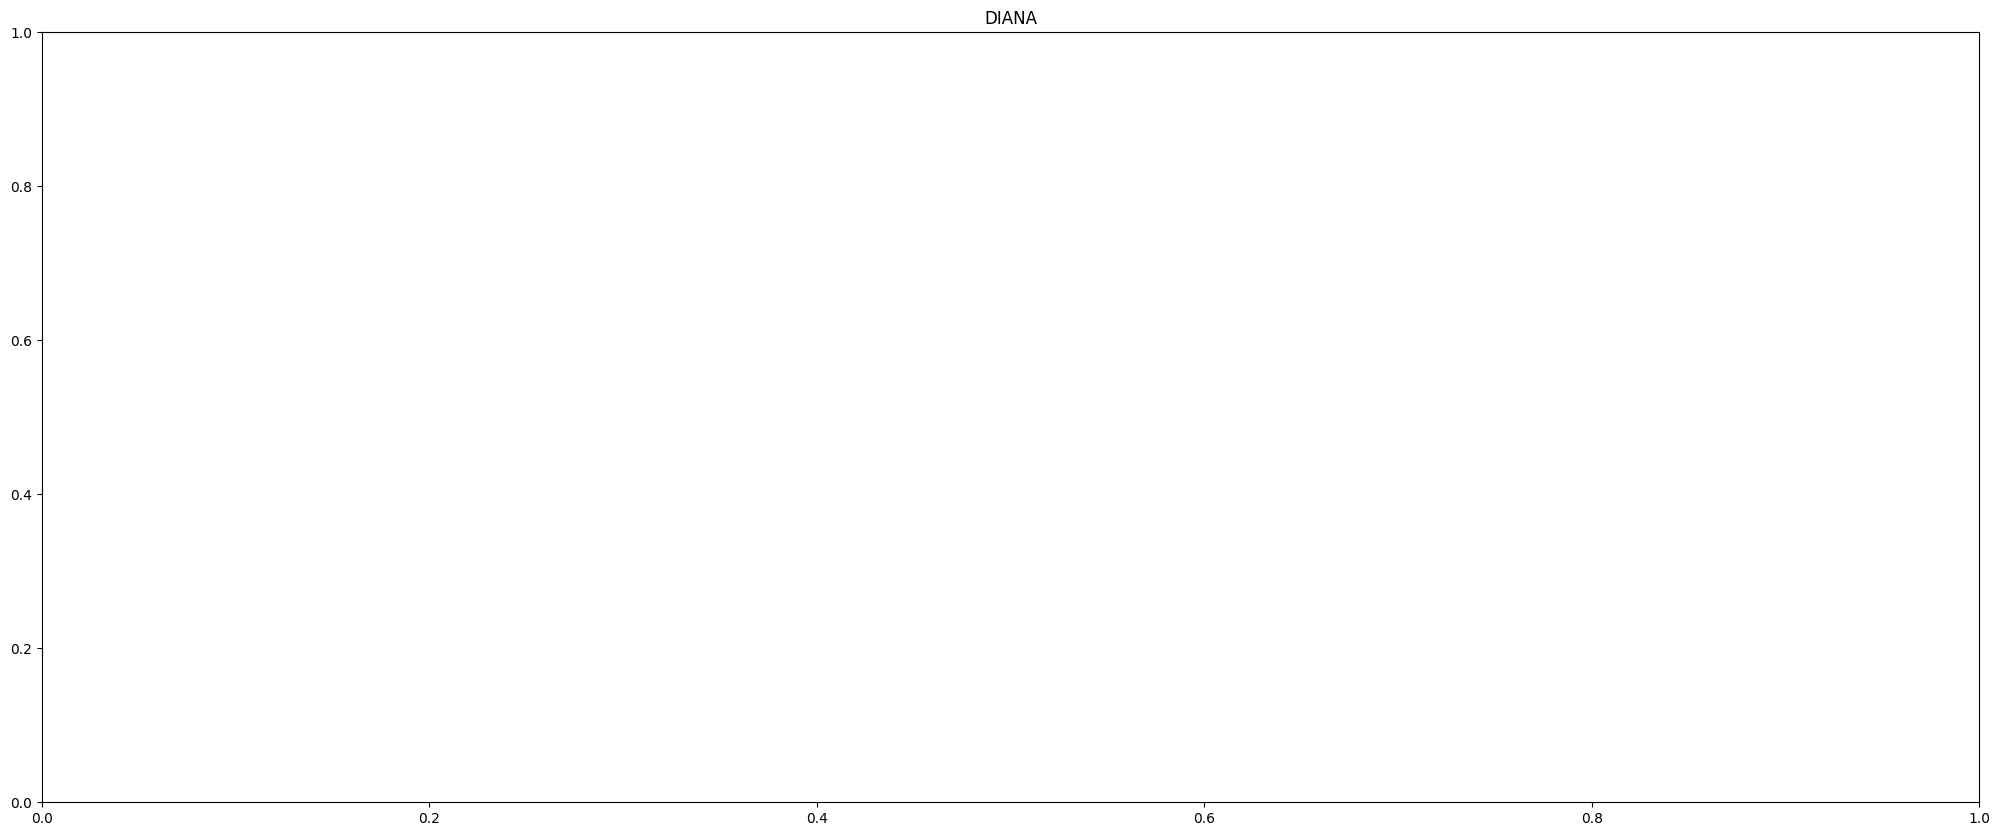

In [9]:
divisive_clustering_function = DivisiveClusteringRandom()

hierrachial_sequence_using_random = get_divisive_sequence(coreset_df, divisive_clustering_function)

random_cost = sum(divisive_clustering_function.get_divisive_cluster_cost(hierrachial_sequence_using_random, coreset_df))

print(f"cost: {random_cost}")

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_random)
dendo.plot_dendrogram()

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 6, 7, 8, 9], [5], [0, 1, 2, 3, 4, 9], [6, 7, 8], [3, 4, 9], [0, 1, 2], [6], [7, 8], [9], [3, 4], [1], [0, 2], [7], [8], [3], [4], [0], [2]]
cost: 255.81673079215815


ValueError: Linkage 'Z' contains negative distances.

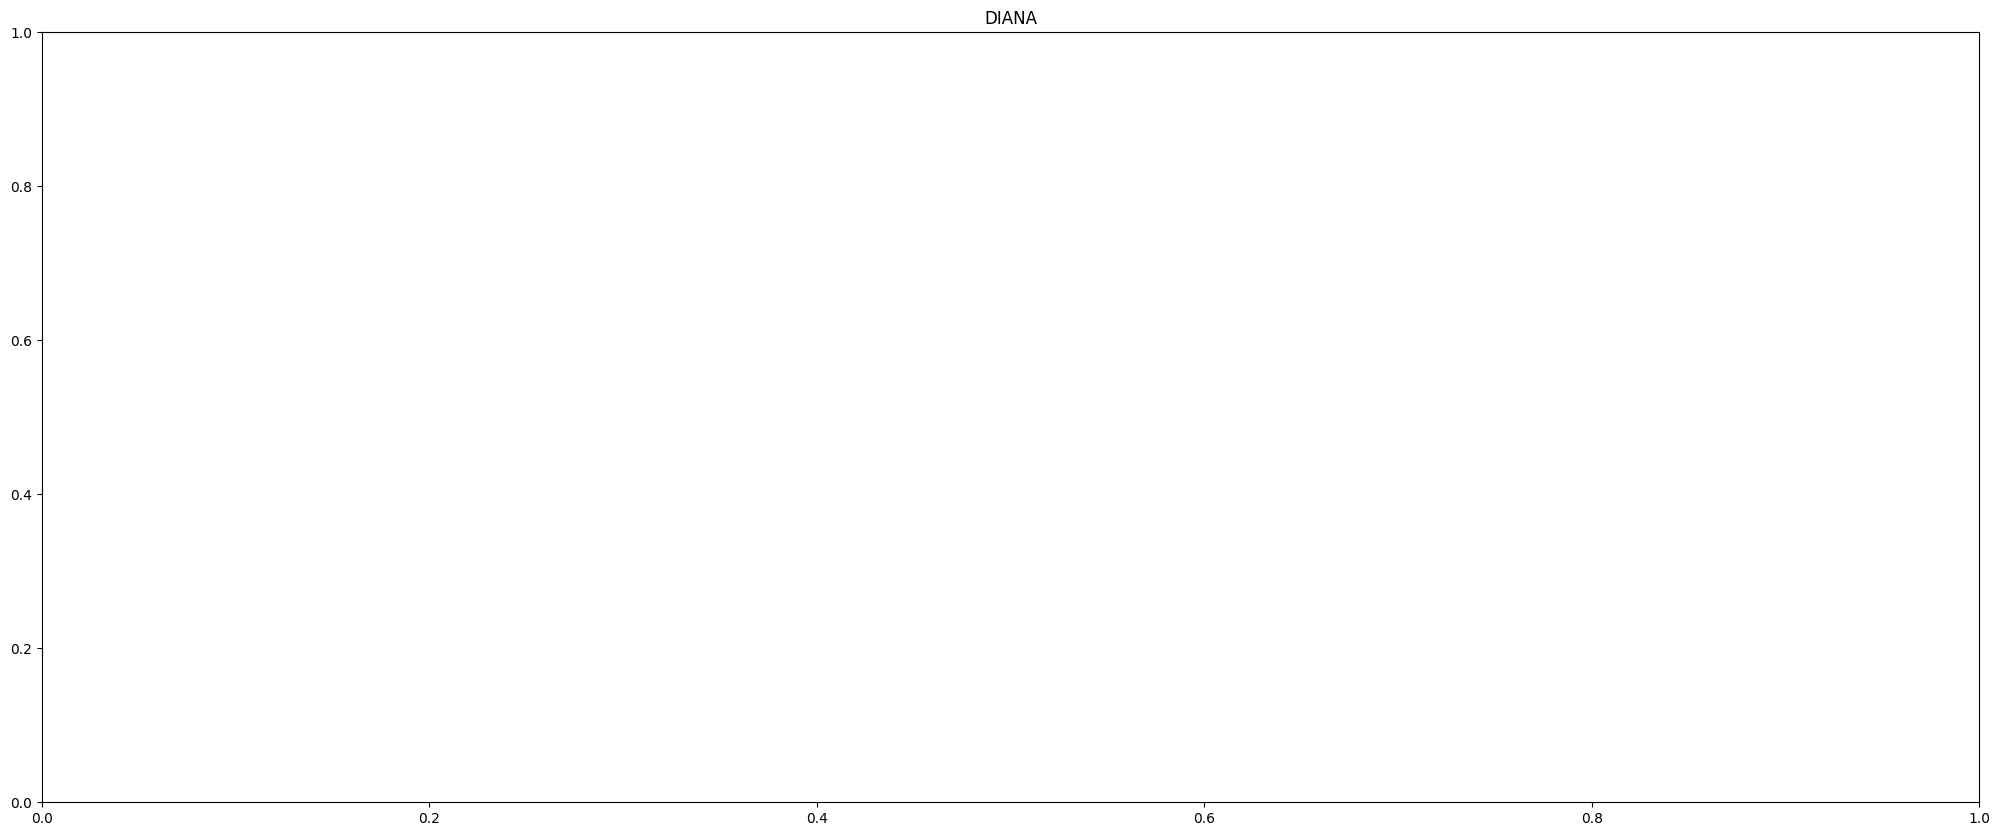

In [10]:
divisive_clustering_function = DivisiveClusteringKMeans()

hierrachial_sequence_using_KMeans = get_divisive_sequence(coreset_df, divisive_clustering_function)

print(hierrachial_sequence_using_KMeans)


KMeans_cost = sum(divisive_clustering_function.get_divisive_cluster_cost(hierrachial_sequence_using_KMeans, coreset_df))

print(f"cost: {KMeans_cost}")

dendo = Dendrogram(coreset_df, hierrachial_sequence_using_KMeans)
dendo.plot_dendrogram()

## Visualizing the cost output

In [11]:
# Define the cost values
cost_values = [random_cost, VQE_cost, KMeans_cost, MaxCut_cost]

# Define the labels for the x-axis
labels = ['Random Cluster','VQE', 'K-means', 'Brute Force']

# Create the bar chart
plt.bar(labels, cost_values)

# Add labels and title
plt.xlabel('Method')
plt.ylabel('Cost Value')
plt.title('Cost Values Comparison (Lower is better)')

# Display the chart
plt.show()

NameError: name 'VQE_cost' is not defined